In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
%matplotlib inline

In [2]:
data = pd.read_csv('../Desktop/machine-learning-ex2/ex2/ex2data1.txt', sep=",", header=None)
data.columns = ["Maths", "Science","Result"]
data.head()


,Maths,Science,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


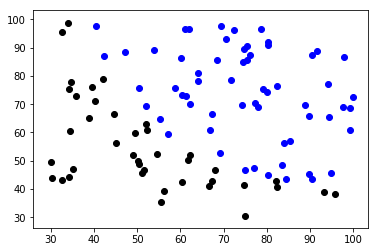

In [3]:
datapov = data[data["Result"] == 1]
dataneg = data[data["Result"] == 0]
plt.scatter(datapov["Maths"],datapov["Science"],color='blue')
plt.scatter(dataneg["Maths"],dataneg["Science"],color='black')
plt.show()

In [4]:
X = np.array(data[['Maths','Science']])
y = np.array(data['Result'])
X = preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [5]:
clf = linear_model.LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.90000000000000002

In [7]:
# clf.coef_

Automatically created module for IPython interactive environment


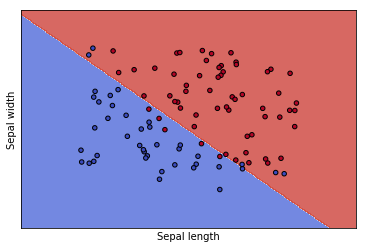

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

ax = plt.gca()

fig = plt.figure()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()
clf